In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import files module
from google.colab import files

# Upload file from your system
uploaded = files.upload()

# Check uploaded file names
for file_name in uploaded.keys():
    print("Uploaded file:", file_name)



Saving Ride_Booking_Dataset.csv to Ride_Booking_Dataset.csv
Uploaded file: Ride_Booking_Dataset.csv


In [7]:
df = pd.read_csv("Ride_Booking_Dataset.csv")
df.head()


,Booking_ID,Booking_Date,Booking_Time,Customer_ID,Driver_ID,Pickup_Location,Drop_Location,Ride_Distance_km,Ride_Duration_min,Fare_Amount,Payment_Method,Ride_Status,Driver_Rating,Customer_Rating
0,BK1000,2025-06-13,03:01:47,CUST328,DRV242,Railway Station,Railway Station,10.61,41.39,189.45,Cash,Completed,4.2,3.3
1,BK1001,2025-04-19,01:01:05,CUST617,DRV716,Airport,IT Park,5.59,11.83,105.82,Cash,Completed,4.2,4.4
2,BK1002,2025-06-16,22:34:26,CUST703,DRV384,Airport,Mall,2.47,9.73,46.09,Cash,Completed,3.4,3.4
3,BK1003,2025-04-19,10:17:09,CUST881,DRV444,Railway Station,Railway Station,6.22,16.22,100.75,Card,Completed,3.9,3.6
4,BK1004,2025-01-25,11:54:22,CUST926,DRV144,College,Railway Station,16.07,36.62,230.40,Card,Completed,3.7,3.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Booking_ID         2000 non-null   object 
 1   Booking_Date       2000 non-null   object 
 2   Booking_Time       2000 non-null   object 
 3   Customer_ID        2000 non-null   object 
 4   Driver_ID          2000 non-null   object 
 5   Pickup_Location    2000 non-null   object 
 6   Drop_Location      2000 non-null   object 
 7   Ride_Distance_km   2000 non-null   float64
 8   Ride_Duration_min  2000 non-null   float64
 9   Fare_Amount        2000 non-null   float64
 10  Payment_Method     2000 non-null   object 
 11  Ride_Status        2000 non-null   object 
 12  Driver_Rating      1723 non-null   float64
 13  Customer_Rating    1723 non-null   float64
dtypes: float64(5), object(9)
memory usage: 218.9+ KB


In [9]:
df.isnull().sum()

,0
Booking_ID,0
Booking_Date,0
Booking_Time,0
Customer_ID,0
Driver_ID,0
Pickup_Location,0
Drop_Location,0
Ride_Distance_km,0
Ride_Duration_min,0
Fare_Amount,0


In [10]:
df.describe()


,Ride_Distance_km,Ride_Duration_min,Fare_Amount,Driver_Rating,Customer_Rating
count,2000.000000,2000.000000,2000.000000,1723.000000,1723.000000
mean,13.565020,40.415595,216.076720,3.986825,3.985258
std,6.487042,21.289292,109.211274,0.573673,0.582550
min,2.010000,4.490000,27.900000,3.000000,3.000000
25%,7.987500,22.817500,124.135000,3.500000,3.500000
50%,13.610000,38.440000,212.015000,4.000000,4.000000
75%,19.062500,55.552500,297.625000,4.500000,4.500000
max,24.970000,97.800000,481.090000,5.000000,5.000000


In [11]:
df.drop_duplicates(inplace=True)

In [13]:
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])


In [14]:
df['Month'] = df['Booking_Date'].dt.month_name()

In [15]:
df['Booking_Hour'] = pd.to_datetime(df['Booking_Time']).dt.hour


/tmp/ipython-input-2241908007.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Booking_Hour'] = pd.to_datetime(df['Booking_Time']).dt.hour


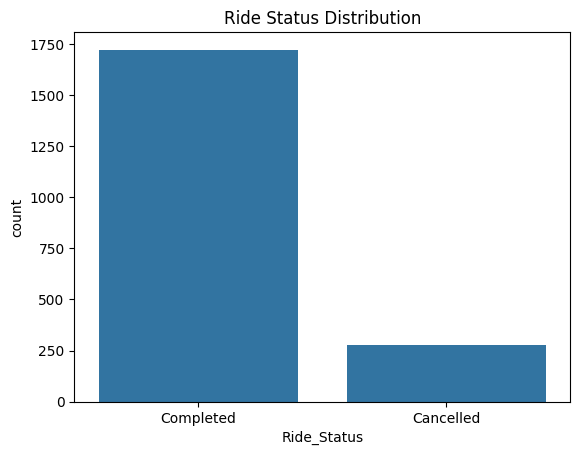

In [16]:
sns.countplot(x='Ride_Status', data=df)
plt.title("Ride Status Distribution")
plt.show()


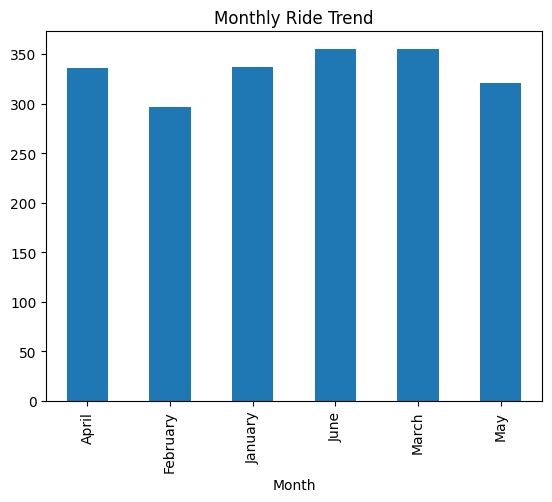

In [17]:
df.groupby('Month')['Booking_ID'].count().plot(kind='bar')
plt.title("Monthly Ride Trend")
plt.show()


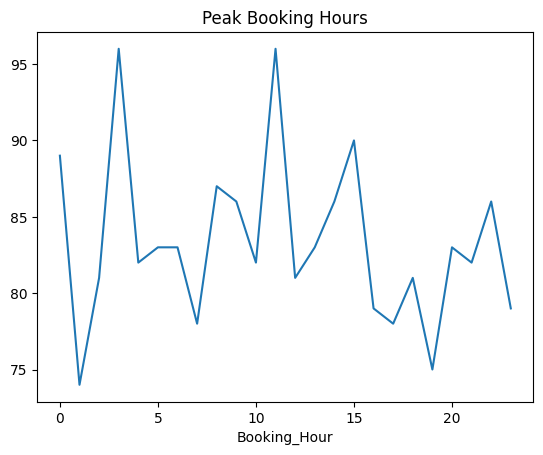

In [18]:
df.groupby('Booking_Hour')['Booking_ID'].count().plot()
plt.title("Peak Booking Hours")
plt.show()


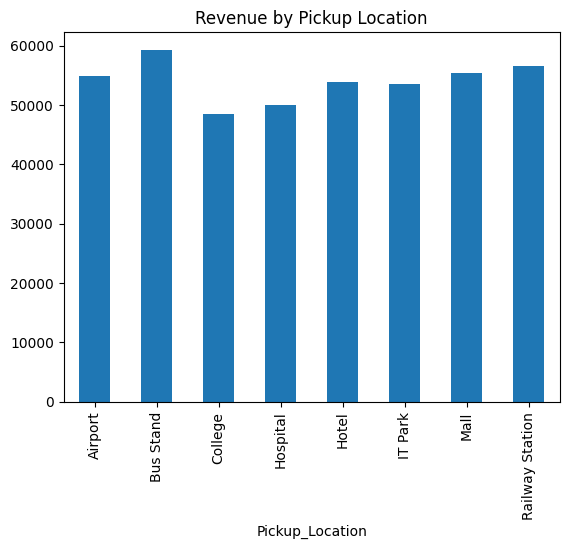

In [19]:
df.groupby('Pickup_Location')['Fare_Amount'].sum().plot(kind='bar')
plt.title("Revenue by Pickup Location")
plt.show()


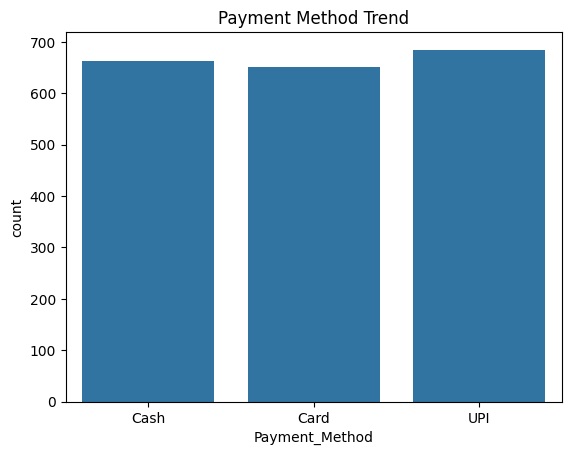

In [20]:
sns.countplot(x='Payment_Method', data=df)
plt.title("Payment Method Trend")
plt.show()


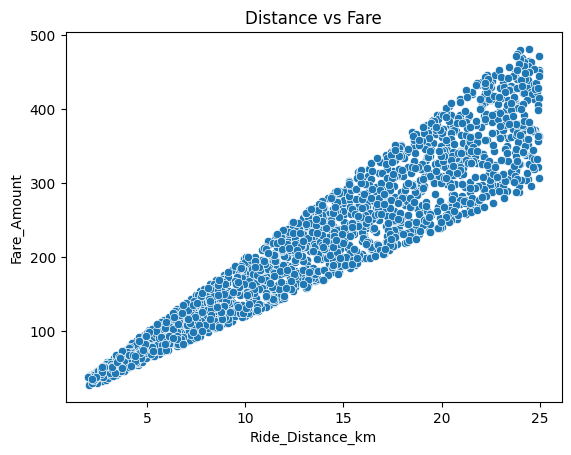

In [21]:
sns.scatterplot(x='Ride_Distance_km', y='Fare_Amount', data=df)
plt.title("Distance vs Fare")
plt.show()



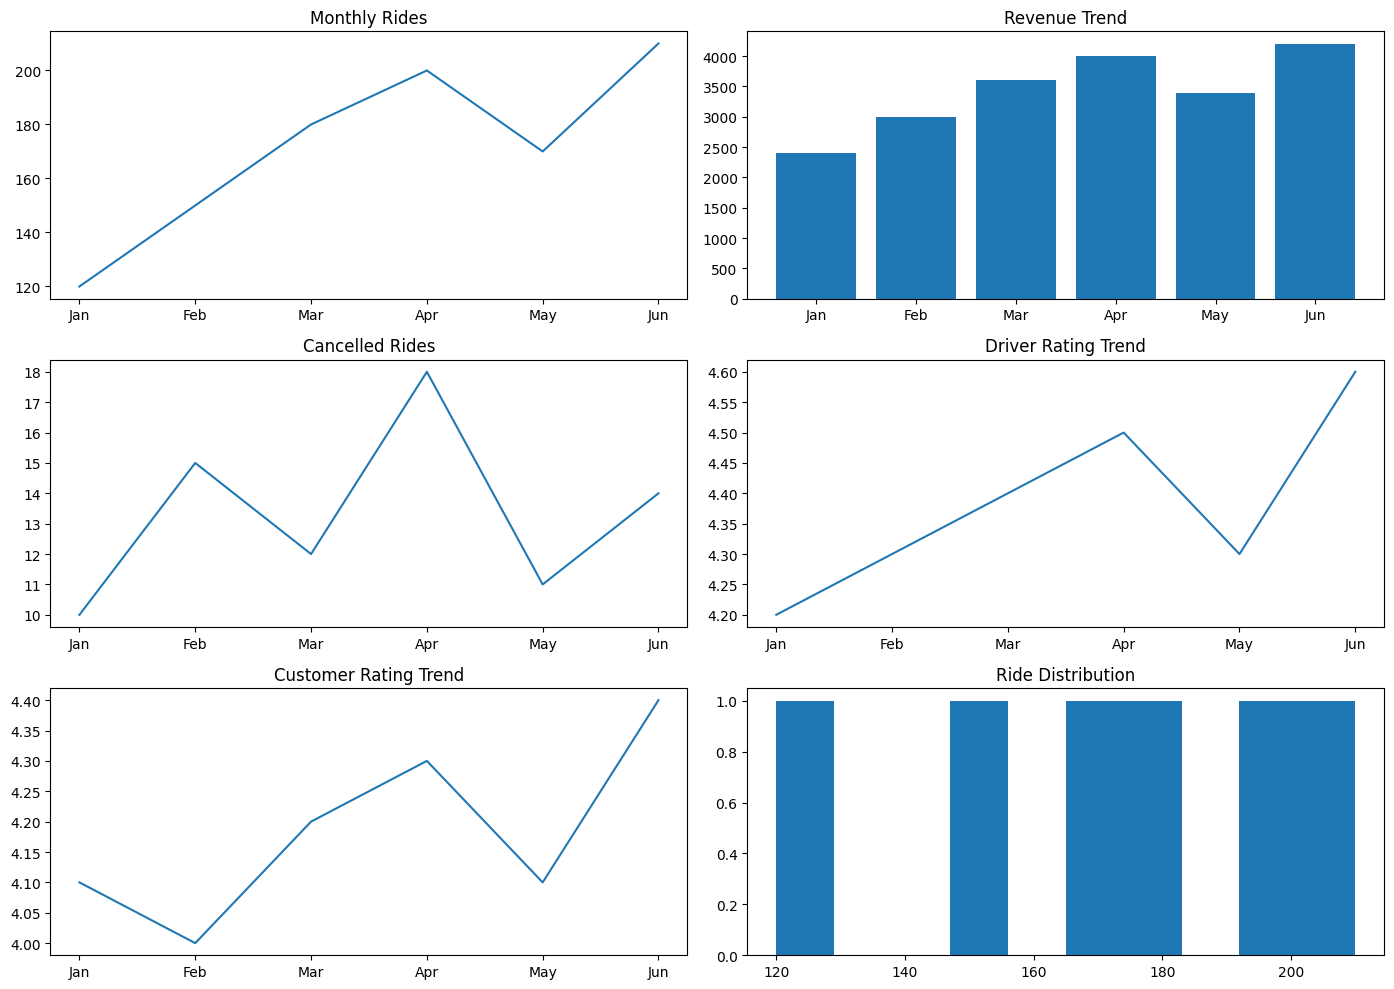

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Dataset (Replace with your actual dataset)
data = {
    "Month": ["Jan","Feb","Mar","Apr","May","Jun"],
    "Rides": [120,150,180,200,170,210],
    "Revenue": [2400,3000,3600,4000,3400,4200],
    "Cancelled": [10,15,12,18,11,14],
    "Driver_Rating": [4.2,4.3,4.4,4.5,4.3,4.6],
    "Customer_Rating": [4.1,4.0,4.2,4.3,4.1,4.4]
}

df = pd.DataFrame(data)

# Create Frame
plt.figure(figsize=(14,10))

# Chart 1 – Monthly Rides
plt.subplot(3,2,1)
plt.plot(df["Month"], df["Rides"])
plt.title("Monthly Rides")

# Chart 2 – Revenue Trend
plt.subplot(3,2,2)
plt.bar(df["Month"], df["Revenue"])
plt.title("Revenue Trend")

# Chart 3 – Cancellation Trend
plt.subplot(3,2,3)
plt.plot(df["Month"], df["Cancelled"])
plt.title("Cancelled Rides")

# Chart 4 – Driver Rating Trend
plt.subplot(3,2,4)
plt.plot(df["Month"], df["Driver_Rating"])
plt.title("Driver Rating Trend")

# Chart 5 – Customer Rating Trend
plt.subplot(3,2,5)
plt.plot(df["Month"], df["Customer_Rating"])
plt.title("Customer Rating Trend")

# Chart 6 – Ride Distribution
plt.subplot(3,2,6)
plt.hist(df["Rides"])
plt.title("Ride Distribution")

plt.tight_layout()
plt.show()
